## Loading Libs

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# model selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [99]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [100]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


## Explore the Data

In [101]:
# print the unique values of each column
train_data.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [102]:
test_data.nunique()

employee_id             23490
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings             9
age                        41
previous_year_rating        5
length_of_service          34
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
dtype: int64

In [103]:
# checking for duplicates
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

0
0


In [104]:
train_data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [105]:
test_data.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [106]:
# filiing missing values with most frequently value

train_data.education = train_data.education.fillna(train_data.education.mode()[0]) 
test_data.education = test_data.education.fillna(test_data.education.mode()[0])

# filling missing values with average value
train_data.previous_year_rating = train_data.previous_year_rating.fillna(train_data.previous_year_rating.mean())
test_data.previous_year_rating = test_data.previous_year_rating.fillna(test_data.previous_year_rating.mean())

test_data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

array([[<AxesSubplot:title={'center':'employee_id'}>,
        <AxesSubplot:title={'center':'no_of_trainings'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'previous_year_rating'}>,
        <AxesSubplot:title={'center':'length_of_service'}>,
        <AxesSubplot:title={'center':'KPIs_met >80%'}>],
       [<AxesSubplot:title={'center':'awards_won?'}>,
        <AxesSubplot:title={'center':'avg_training_score'}>,
        <AxesSubplot:title={'center':'is_promoted'}>]], dtype=object)

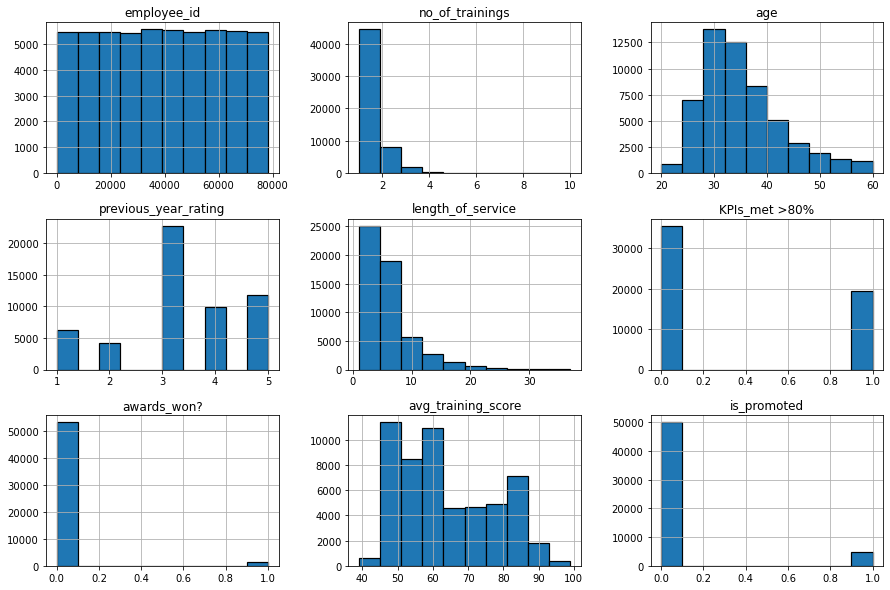

In [107]:
train_data.hist(edgecolor='black', linewidth=1.2, figsize=(15, 10))

In [108]:
train_data['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [109]:
# mapping education into numeric rate
education_levels = {"Below Secondary": 1 ,"Bachelor's": 2, "Master's & above": 3}

train_data["education"] = train_data["education"].map(education_levels)
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,3,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,2,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,2,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,2,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,2,m,other,1,45,3.0,2,0,0,73,0


In [110]:
train_data.describe()


,employee_id,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,2.257627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.469717,0.609264,7.660169,1.211661,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,2.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,2.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,3.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,3.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [111]:
df_plot = train_data.groupby('gender')['is_promoted'].sum().reset_index()
df_plot

,gender,is_promoted
0,f,1467
1,m,3201


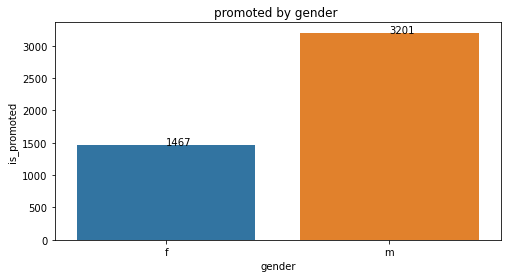

In [112]:
plt.figure(figsize=(8,4))
sns.barplot(data= df_plot , x = 'gender', y= 'is_promoted')
plt.title('promoted by gender ')

for i,v in enumerate(df_plot.is_promoted):
    plt.text(x=i,y=v,s=v)

Text(0.5, 1.0, 'promoted per department per gender')

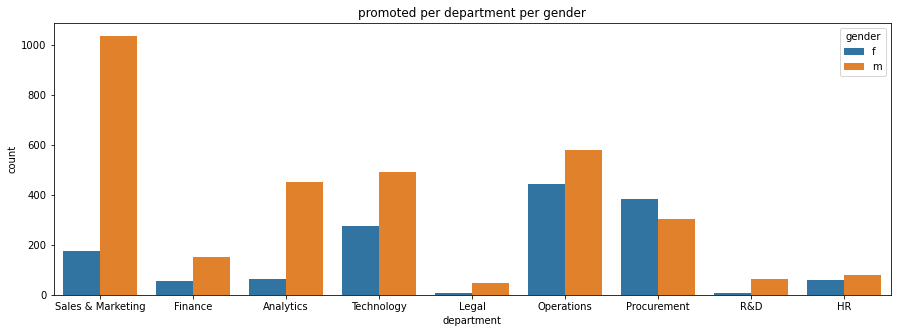

In [113]:
plt.figure(figsize=(15,5))
sns.countplot(data=train_data.query('is_promoted == 1'),x='department',hue= 'gender')
plt.title('promoted per department per gender')


([<matplotlib.axis.XTick at 0x287459a51f0>,
 [Text(0, 0, 'Below Secondary'),
  Text(1, 0, 'Bachelors'),
  Text(2, 0, 'Masters')])

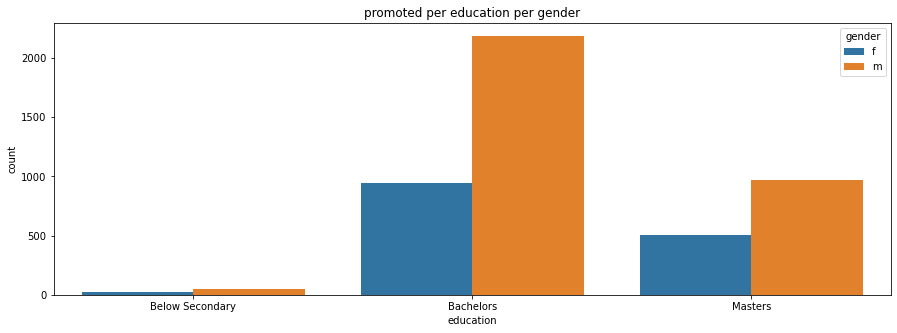

In [114]:
plt.figure(figsize=(15,5))
sns.countplot(data=train_data.query('is_promoted == 1'),x='education',hue= 'gender')
plt.title('promoted per education per gender')
plt.xticks(ticks=[0,1,2],labels=('Below Secondary','Bachelors','Masters'))

In [115]:
train_data.drop(['employee_id','department','region','gender','recruitment_channel','age','awards_won?'], axis = 1,inplace = True)
train_data.head()

,education,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted
0,3,1,5.0,8,1,49,0
1,2,1,5.0,4,0,60,0
2,2,1,3.0,7,0,50,0
3,2,2,1.0,10,0,50,0
4,2,1,3.0,2,0,73,0


In [116]:
# splitting data into featurs and targets

X = train_data.drop(['is_promoted'],axis=1)
Y = train_data['is_promoted']

In [117]:
X = pd.get_dummies(X)
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=2,test_size=0.2)

In [118]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    print(f'Training_Accuracy : {train}\n Testing_Accuracy : {test}')
    
    print(f'Classification Report :\n',classification_report(ytest,ypred))
    return model

In [119]:
logistic_ragression_model = mymodel(LogisticRegression())

Training_Accuracy : 0.9162523377275008
 Testing_Accuracy : 0.9146141215106732
Classification Report :
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     10015
           1       0.92      0.01      0.03       947

    accuracy                           0.91     10962
   macro avg       0.92      0.51      0.49     10962
weighted avg       0.92      0.91      0.87     10962



In [120]:
knn_model = mymodel(KNeighborsClassifier())


Training_Accuracy : 0.9258085116088126
 Testing_Accuracy : 0.9147965699689837
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     10015
           1       0.53      0.14      0.22       947

    accuracy                           0.91     10962
   macro avg       0.72      0.56      0.59     10962
weighted avg       0.89      0.91      0.89     10962



In [121]:
decision_tree_model = mymodel(DecisionTreeClassifier())


Training_Accuracy : 0.9451945445422616
 Testing_Accuracy : 0.9030286444079547
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10015
           1       0.37      0.18      0.25       947

    accuracy                           0.90     10962
   macro avg       0.65      0.58      0.60     10962
weighted avg       0.88      0.90      0.89     10962



In [122]:
svm_model = mymodel(SVC())


Training_Accuracy : 0.9151347899466314
 Testing_Accuracy : 0.9136106549899653
Classification Report :
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     10015
           1       0.00      0.00      0.00       947

    accuracy                           0.91     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.83      0.91      0.87     10962



c:\Users\El-Wattaneya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\El-Wattaneya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\El-Wattaneya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
